# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1022.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.33e-42
Time:                        09:24:21   Log-Likelihood:                 2.3512
No. Observations:                  50   AIC:                             3.298
Df Residuals:                      46   BIC:                             10.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8959      0.082     59.680      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.35746669  4.86421366  5.32925826  5.72374652  6.02923773  6.24073419
  6.36750228  6.43155007  6.4640114   6.50003075  6.57298902  6.70901921
  6.92271281  7.21472247  7.57165475  7.96827065  8.37163231  8.74651457
  9.06119242  9.29265326  9.43037787  9.47806865  9.45304135  9.38338011
  9.30332335  9.24763846  9.24590965  9.31767733  9.46922768  9.69255983
  9.96670042 10.26114943 10.54089125 10.77214767 10.92792752 10.99246125
 10.96379181 10.85409623 10.68768492 10.49700755 10.31732169 10.18090005
 10.1117282  10.12156379 10.20800479 10.35488418 10.53492608 10.71422718
 10.85782687 10.93545126]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9114806  10.74752758 10.46435478 10.10927752  9.74457941  9.43226313
  9.21887004  9.12408521  9.13591784  9.21363705]


## Plot comparison

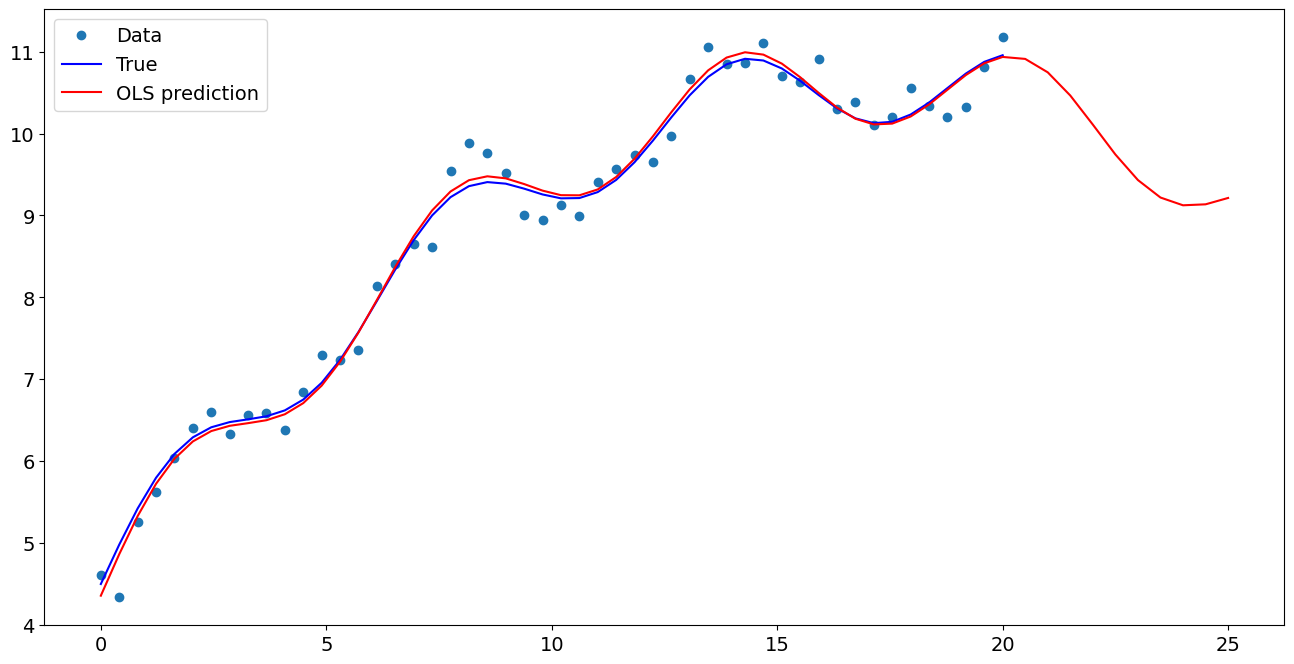

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.895877
x1                  0.520096
np.sin(x1)          0.529439
I((x1 - 5) ** 2)   -0.021536
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.911481
1    10.747528
2    10.464355
3    10.109278
4     9.744579
5     9.432263
6     9.218870
7     9.124085
8     9.135918
9     9.213637
dtype: float64